In [1]:
import geopandas as gpd
import shapely
import glob
from shapely.geometry import Polygon
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
rd_string = ("+proj=sterea +lat_0=52.15616055555555 +lon_0=5.38763888888889 "
             "+k=0.999908 +x_0=155000 +y_0=463000 +ellps=bessel +units=m "
             "+towgs84=565.2369,50.0087,465.658,-0.406857330322398,0.350732676542563,-1.8703473836068,4.0812 "
             "+no_defs +no_defs")

In [79]:
path = r'D:\Projects\Pr\3317.30\Toelevering\2018-03-22 wijziging baggervak\later'
shp_files = glob.glob(r'{}\**\*.shp'.format(path), recursive=True)
print(shp_files, len(shp_files))

['D:\\Projects\\Pr\\3317.30\\Toelevering\\2018-03-22 wijziging baggervak\\later\\10. 1.7.2.3.1.B Harlingen - Noordzee, Blauwe Slenk\\180321_BS-Noordzee_RD\\1.7.2.3.1.B_180321_BS-Noordzee_RD.shp', 'D:\\Projects\\Pr\\3317.30\\Toelevering\\2018-03-22 wijziging baggervak\\later\\19. 1.7.2.1.1.B Harlingen - Terschelling, Schuitengat\\180321_Terschelling, Schuitengat_RD\\1.7.2.1.1.B_180321_Terschelling, Schuitengat_RD.shp'] 2


In [91]:
gdf_comb = gpd.GeoDataFrame()

In [92]:
for idx, shp in enumerate(shp_files):
    print(idx, shp)
    
    gdf = gpd.read_file(shp)
    gdf.crs = rd_string

    end = 21000101
    start = 20180401

    if '1.7.2.3.1.B_180321_BS-Noordzee_RD' in shp:
        start = 20171117    
        objectcode = '1.7.2.3.1.B'    
    
    if '1.7.2.1.1.B_180321_Terschelling' in shp:
#         start = 20171117    
        objectcode = '1.7.2.1.1.B'       
    
    if '1.7.1.3.1.B_180321_DH-DO-VJG-DO_RD' in shp:
#         start = 20171117    
        objectcode = '1.7.1.3.1.B'  
    
    if '1.7.2.3.1_PD' in shp:
#         start = 20171117    
        objectcode = '1.7.2.3.1'      
    
    if '1.7.2.3.3_180321_Pannegat_RD' in shp:
#         start = 20171117    
        objectcode = '1.7.2.3.3'  
    
    if '1.7.2.1.1_180321_Slenk_RD' in shp:
#         start = 20170927    
        objectcode = '1.7.2.1.1'

    if '1.7.4.1.1_180321_Glinder_RD' in shp:
#         start = 20171117
        objectcode = '1.7.4.1.1'

    if '1.7.2.1.1.A_180321_West' in shp:
#         start = 20170927
        objectcode = '1.7.2.1.1.A'    


    gdf.loc[0,'geometry'] = Polygon(gdf.geometry[0])    
    gdf['START'] = pd.Series([start], index=gdf.index)
    gdf['END'] = pd.Series([end], index=gdf.index)
    gdf['OBJECTCODE'] = pd.Series([objectcode], index=gdf.index)
    
    gdf_comb = gdf_comb.append(gdf)#, ignore_index=True)

0 D:\Projects\Pr\3317.30\Toelevering\2018-03-22 wijziging baggervak\later\10. 1.7.2.3.1.B Harlingen - Noordzee, Blauwe Slenk\180321_BS-Noordzee_RD\1.7.2.3.1.B_180321_BS-Noordzee_RD.shp
1 D:\Projects\Pr\3317.30\Toelevering\2018-03-22 wijziging baggervak\later\19. 1.7.2.1.1.B Harlingen - Terschelling, Schuitengat\180321_Terschelling, Schuitengat_RD\1.7.2.1.1.B_180321_Terschelling, Schuitengat_RD.shp


In [93]:
gdf_comb

,geometry,START,END,OBJECTCODE
0,"POLYGON ((149448.361 580248.868, 149248.334 58...",20171117,21000101,1.7.2.3.1.B
0,"POLYGON ((143852.9513721167 596378.7145864532,...",20180401,21000101,1.7.2.1.1.B


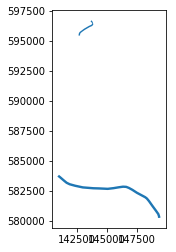

In [94]:
gdf_comb.plot()

In [96]:
# read current valid shapefile
shp_baggervakken = r'D:\FEWSProjecten\OmsWaddenzee\trunk\fews\Config\MapLayerFiles\Baggervakken\Baggervakken_update2.shp'
df_bgv = gpd.read_file(shp_baggervakken)
df_bgv.head()

,ACTIVITEIT,AREA_REAL,DEFAULT_1,DIEPTE_MAX,DIEPTE_MIN,END,FRQ_EXC_50,FRQ_INC_50,FRQ_SURV,GUN_DAGEN,...,TYPEOBJ,WBO_CONCL,WBO_DAGEN,WBO_FILE,WBO_GELDIG,WBO_M_DAT,WBO_R_DAT,X_LABEL,Y_LABEL,geometry
0,Taak,482619.0,1.0,8.0,7.5,21000101,4,2,6,-999,...,vaarweg,Verspreidbaar,404,KRD15-8600-6024-RAP-013a_harlingen-terschellin...,43030.0,42299.0,42332.0,149590.0,579048.0,"POLYGON ((149442.7124357932 580249.0740603911,..."
1,Raamact.,130307.0,1.0,4.0,3.5,21000101,4,2,6,-999,...,vaarweg,Verspreidbaar,401,DOM15-8600-6024-RAP-012a_den_oever-noordzee.pdf,43027.0,42296.0,42319.0,130187.0,552283.0,"POLYGON ((129625.932283378 552658.7841377998, ..."
2,Taak,228640.0,1.0,4.0,3.8,20180209,12,4,12,-999,...,vaarweg,Verspreidbaar,403,KRD15-8600-6024-RAP-014a_holwerd-ameland.pdf,43029.0,42298.0,42325.0,185655.0,601008.0,"POLYGON ((185317.6546756364 601556.7232466646,..."
3,Taak,29066.0,1.0,4.0,3.8,20180209,12,4,12,-999,...,vaarweg,Verspreidbaar,403,KRD15-8600-6024-RAP-014a_holwerd-ameland.pdf,43029.0,42298.0,42325.0,181012.0,604198.0,"POLYGON ((181240.1501464844 604087.0973510742,..."
4,Taak,38258.0,1.0,4.0,3.8,20180209,12,4,12,-999,...,vaarweg,Verspreidbaar,403,KRD15-8600-6024-RAP-014a_holwerd-ameland.pdf,43029.0,42298.0,42298.0,180144.0,604998.0,"POLYGON ((180660.1662909701 605207.5438269211,..."


In [97]:
# append new shapes baggervakken
df_bg_new = df_bgv.append(gdf_comb)

In [98]:
# reset and drop the index
df_bg_new.reset_index(drop=True, inplace=True)

In [99]:
# change END date last valid feature
# and copyover other metadata to new valid feature
for idx,val in gdf_comb.iterrows():
    print(val['OBJECTCODE'])
    obj_code = val['OBJECTCODE']
    df_sel = df_bg_new[df_bg_new['OBJECTCODE']==obj_code]
    
    # only select latest two known baggervakken
    df_sel.START = df_sel.START.astype(int)
    df_iter_two_row = df_sel.sort_values(by=['START'], ascending=False)[0:2]

    # copy all column values except column START, END and geometry
    unwanted = {'START','END','geometry'}
    item_list = [e for e in df_iter_two_row.columns if e not in unwanted]
    df_iter_two_row.loc[(df_iter_two_row.index.isin(df_iter_two_row.index[:1])), item_list] = df_iter_two_row.loc[(
        df_iter_two_row.index.isin(df_iter_two_row.index[1:])), item_list].values

    # change END date of former valid feature to START date of existing valid baggervak
    df_iter_two_row.END.iloc[1] = df_iter_two_row.START.iloc[0]    
    print(df_iter_two_row.loc[:,['END','START', 'OBJECTCODE', 'OBJECTNAAM']])
    
    # set adapted row in the bigger geodataframe
    df_bg_new.iloc[df_iter_two_row.index] = df_iter_two_row    

1.7.2.3.1.B
          END     START   OBJECTCODE                          OBJECTNAAM
120  21000101  20171117  1.7.2.3.1.B  Harlingen - Noordzee, Blauwe Slenk
94   20171117  20160101  1.7.2.3.1.B  Harlingen - Noordzee, Blauwe Slenk
1.7.2.1.1.B


c:\python35\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
c:\python35\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


          END     START   OBJECTCODE                             OBJECTNAAM
121  21000101  20180401  1.7.2.1.1.B  Harlingen - Terschelling, Schuitengat
102  20180401  20171117  1.7.2.1.1.B  Harlingen - Terschelling, Schuitengat


In [100]:
new_path = r'D:\FEWSProjecten\OmsWaddenzee\trunk\fews\Config\MapLayerFiles\Baggervakken\Baggervakken_update3.shp'
df_bg_new.to_file(new_path)

In [21]:
duplicates_all = df_bg_new[df_bg_new['OBJECTCODE'].duplicated(keep=False)]

In [22]:
duplicates_all.index

Int64Index([  1,   2,   3,   4,   6,   7,   8,  11,  26,  81,  84,  87,  88,
             94,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
            111, 112, 113, 114, 115, 116, 117, 118, 119],
           dtype='int64')

In [23]:
## FURTHER CHANGES APPLIED IN QGIS (FILL COLUMN AND CHANGING END DATE OF PREVIOUS VALID BAGGERVAK)

In [ ]:
## VALIDATE  NEW BAGGERVAKKEN

In [24]:
def baggervak_to_current(path_shp, crs_string):
    """
    function to get current valid baggervakken
    also sets appropriate coordinates system
    """

    gdf = gpd.read_file(path_shp)
    gdf.crs = rd_string

    # only get currently valid shapes
    # get list of duplicates (both the first and last [and middles if available])
    duplicates_all = gdf[gdf['OBJECTCODE'].duplicated(keep=False)]
    for obj in duplicates_all['OBJECTCODE'].unique():
        duplicates_single = duplicates_all.loc[duplicates_all['OBJECTCODE'] == obj]
        rows2drop = duplicates_single.loc[duplicates_single['END']
                                          != duplicates_single['END'].max()]
        gdf.drop(rows2drop.index.tolist(), axis=0, inplace=True)
    return gdf

In [25]:
shp_baggervakken = r'D:\FEWSProjecten\OmsWaddenzee\trunk\fews\Config\MapLayerFiles\Baggervakken\Baggervakken.shp'

In [26]:
bgf_val = baggervak_to_current(shp_baggervakken, rd_string)

In [27]:
len(bgf_val['OBJECTCODE'].unique())

100

In [28]:
len(bgf_val['OBJECTCODE'])

100